<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0714_46%EC%9D%BC%EC%B0%A8_AI%5Bmglearn%2Cclf_eval%2C_eval_binar%2C_reca_plot%2C_frc%2C_binar%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install mglearn

In [4]:
import mglearn

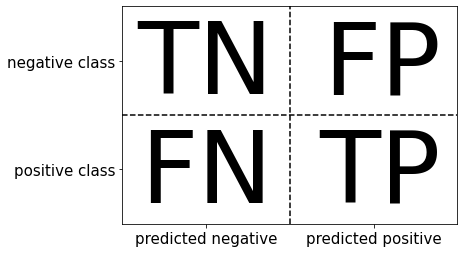

In [5]:
mglearn.plots.plot_binary_confusion_matrix() #confusion matrix 보여주기

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [41]:
def get_clf_eval(y_test, pred):
    confusion= confusion_matrix(y_test, pred)
    accuracy= accuracy_score(y_test, pred)
    precision= precision_score(y_test, pred)
    recall= recall_score(y_test, pred)
    print(confusion, accuracy, precision, recall)

In [23]:
titanic = pd.read_csv('./drive/MyDrive/titanic_train.csv')

In [25]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df


# 러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


# 라벨 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
from sklearn.preprocessing import MinMaxScaler
def adj_scale(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_array = scaler.transform(df)
    df_scaled = pd.DataFrame(data=scaled_array, columns=df.columns)
    return df_scaled

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    df = adj_scale(df)
    return df

In [26]:
y_titanic = titanic.Survived
X_titanic = titanic.drop('Survived', axis=1)

In [27]:
X_titanic = transform_features(X_titanic)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic)

In [29]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [30]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[108  26]
 [ 23  66]] 0.7802690582959642 0.717391304347826 0.7415730337078652


In [32]:
#확률값을 산출해주는 method
pred_proba = dt_clf.predict_proba(X_test)

In [35]:
pred_proba[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [34]:
pred[:3]

array([0, 0, 0])

In [36]:
lr_clf = LogisticRegression(max_iter=5000)

In [37]:
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[116  18]
 [ 21  68]] 0.8251121076233184 0.7906976744186046 0.7640449438202247


In [38]:
pred_proba = lr_clf.predict_proba(X_test)

In [39]:
pred_proba[:3]

array([[0.37636451, 0.62363549],
       [0.47404787, 0.52595213],
       [0.87164117, 0.12835883]])

In [42]:
pred_proba.shape, pred.shape

((223, 2), (223,))

In [43]:
pred_proba[222], pred[222]

(array([0.8358544, 0.1641456]), 0)

In [44]:
np.concatenate([pred_proba[:3], pred[:3,np.newaxis]], axis=1)

array([[0.37636451, 0.62363549, 1.        ],
       [0.47404787, 0.52595213, 1.        ],
       [0.87164117, 0.12835883, 0.        ]])

임계값을 조절하여, 정밀도와 재현율을 변경할 수 있다.

임계값 -> 확률 : pred_proba

확률이 0.2 이상이면 1

0.2 미만이면 0으로 해라 : Bianarizer



In [45]:
from sklearn.preprocessing import Binarizer

In [47]:
x = [[1, -1, 2], [2, 0, 0],[0, 1.1, 1.5]]

In [49]:
binar = Binarizer(threshold=1.1)
print(binar.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [50]:
binar = Binarizer(threshold=0.5)
y_binar = binar.fit_transform(pred_proba)
y_binar[:,1]

array([1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0.])

In [51]:
y_test.shape, y_binar[:, 1].shape

((223,), (223,))

In [52]:
get_clf_eval(y_test, y_binar[:,1])

[[116  18]
 [ 21  68]] 0.8251121076233184 0.7906976744186046 0.7640449438202247


In [53]:
def get_eval_binar(thresholds, y_tests, pred_probas):
  binar = Binarizer(threshold = thresholds)
  y_binar = binar.fit_transform(pred_probas)
  print("##", thresholds, ':')
  get_clf_eval(y_tests, y_binar[:,1])

In [54]:
thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]
for i in thresholds:
  get_eval_binar(i, y_test, pred_proba)

## 0.4 :
[[107  27]
 [ 17  72]] 0.8026905829596412 0.7272727272727273 0.8089887640449438
## 0.45 :
[[111  23]
 [ 17  72]] 0.820627802690583 0.7578947368421053 0.8089887640449438
## 0.5 :
[[116  18]
 [ 21  68]] 0.8251121076233184 0.7906976744186046 0.7640449438202247
## 0.55 :
[[119  15]
 [ 23  66]] 0.8295964125560538 0.8148148148148148 0.7415730337078652
## 0.6 :
[[123  11]
 [ 30  59]] 0.8161434977578476 0.8428571428571429 0.6629213483146067


In [55]:
from sklearn.metrics import precision_recall_curve

In [56]:
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [57]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

In [62]:
idx = thresholds.shape[0]

In [63]:
idx

189

In [58]:
sample_index = np.arange(0, thresholds.shape[0], 15)
print(sample_index)
print()
print('선택된 임계값 : ', thresholds[sample_index])
print()
print('정밀도 : ', precisions[sample_index] )
print()
print('재현율 : ', recalls[sample_index] )

[  0  15  30  45  60  75  90 105 120 135 150 165 180]

선택된 임계값 :  [0.0988518  0.11221033 0.1267148  0.14122028 0.19008207 0.22676762
 0.37916911 0.50022166 0.59699612 0.67670774 0.75064558 0.80891325
 0.92793859]

정밀도 :  [0.44278607 0.47513812 0.51515152 0.55333333 0.61363636 0.66666667
 0.72277228 0.79069767 0.84507042 0.88888889 0.8974359  0.95833333
 1.        ]

재현율 :  [1.         0.96629213 0.95505618 0.93258427 0.91011236 0.87640449
 0.82022472 0.76404494 0.6741573  0.53932584 0.39325843 0.25842697
 0.1011236 ]


In [59]:
def pre_reca_plot(precisions, recalls, thresholds):
  fig, axes = plt.subplots()
  axes.plot(thresholds, precisions, 'k--', label = 'precisions')
  axes.plot(thresholds, recalls, 'g-', label='recalls')
  axes.legend()
  axes.set_xlabel('threshold')
  axes.set_ylabel('Precision & Recall')
  axes.grid()

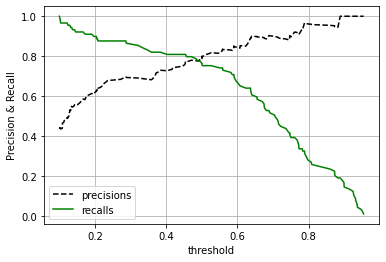

In [64]:
pre_reca_plot(precisions[:idx], recalls[:idx], thresholds[:idx])

$$precision = {TP \over TP+FP} =1$$

fp = 0, tp=1

fp = 0 -> 전부다 Negative 예측

재현율, 정밀도 높다 => TP가 크다

TP가 같다고 가정하고,

recall : FN이 작아야한다 => 

Precision : FP 가 작아야한다. =>

$$recall = {TP \over TP+FN} =1$$

fn = 0 -> 전부다 positive 예측

#F1_score

정밀도와 재현율이 ,TN, TP, FP, FN의 어느 한쪽만 참조하면 극단적인 수치 조작이 가능하므로 이런 맹점을 어느정도 해소하기위한 정의

$$F1 = {2 \over {1 \over recall} + {1 \over precision}}$$

In [65]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
f1

0.7771428571428571

In [78]:
def get_frc(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print(confusion, np.round(accuracy, 3), np.round(precision, 3), np.round(recall, 3), f1)

In [79]:
def get_binar(thresholds, y_tests, pred_probas):
  binar = Binarizer(threshold = thresholds)
  y_binar = binar.fit_transform(pred_probas)
  print("##", thresholds, ':')
  get_frc(y_tests, y_binar[:,1])

In [80]:
thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)

In [81]:
for i in thresholds:
  get_binar(i, y_test, pred_proba)

## 0.4 :
[[107  27]
 [ 17  72]] 0.803 0.727 0.809 0.7659574468085106
## 0.45 :
[[111  23]
 [ 17  72]] 0.821 0.758 0.809 0.782608695652174
## 0.5 :
[[116  18]
 [ 21  68]] 0.825 0.791 0.764 0.7771428571428571
## 0.55 :
[[119  15]
 [ 23  66]] 0.83 0.815 0.742 0.7764705882352941
## 0.6 :
[[123  11]
 [ 30  59]] 0.816 0.843 0.663 0.7421383647798743


#ROC AUC

**TPR = TP / (FN + TP)**

```
  FN + TP : 실제 모두 양성인 수

  TP/ (FN + TP) : 양성인 것 중에서 양성으로 잘 분류 해낸 비율

  1을 1로 분류한 비율
```


**FPR = FP / (TN + FP)**

```
  TN  + FP : 실제 모두 음성인 수

  FP / (TN + FP) : 음성인 것 중에서 양성으로 잘못 분류해낸 비율

  0을 1로 분류한 비율(1-TNF)
```



In [82]:
from sklearn.metrics import roc_curve

In [83]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

In [84]:
fprs, tprs , thresholds = roc_curve(y_test, pred_proba_class1)

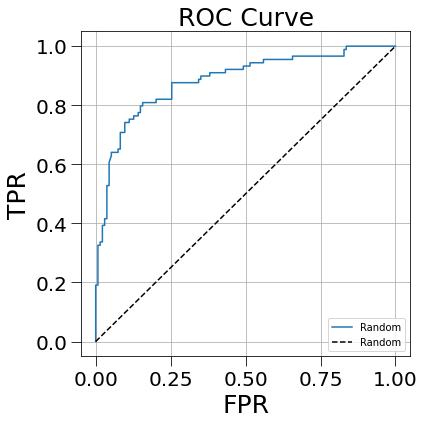

In [88]:
plt.figure(figsize=(6,6))
plt.plot(fprs, tprs, label = 'Random')
plt.plot([0, 1],[0,1], 'k--', label = 'Random')
plt.xlabel('FPR', fontsize=25)
plt.ylabel('TPR', fontsize=25)
plt.tick_params(length=10, labelsize= 20)
plt.title('ROC Curve', fontsize =25)
plt.tight_layout()
plt.grid()
plt.legend(loc= 'lower right')

In [89]:
from sklearn.metrics import roc_auc_score
r_auc_s = roc_auc_score(y_test, pred_proba_class1)

In [90]:
r_auc_s

0.8829448264296496

In [92]:
def get_frc(y_test, pred=None, pred_probas = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_aucs = roc_auc_score(y_test,pred_probas)
  print(confusion, accuracy, precision, recall, f1, roc_aucs)

In [93]:
get_frc(y_test, pred, pred_proba_class1)

[[116  18]
 [ 21  68]] 0.8251121076233184 0.7906976744186046 0.7640449438202247 0.7771428571428571 0.8829448264296496
